[[3 1]
 [0 2]]
0.8333333333333334
 이 거리 는 널 기다린다고늘 에 외쳐 본다 해  하루 
[[ 36.66508162  21.28208391   4.04973201]
 [ -2.64087636 -16.20653729 -24.52497727]
 [-30.61294192  29.76033571   2.42716271]
 [ -4.25632298 -21.27793281  29.55386333]
 [  2.0217206   -5.80801263  -8.34678758]
 [ -1.17666096  -7.74993689  -3.15899321]]
[0 1 0 1 1 1]


/Users/tmp/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52395 (\N{HANGUL SYLLABLE CEOS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tmp/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tmp/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tmp/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tmp/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.

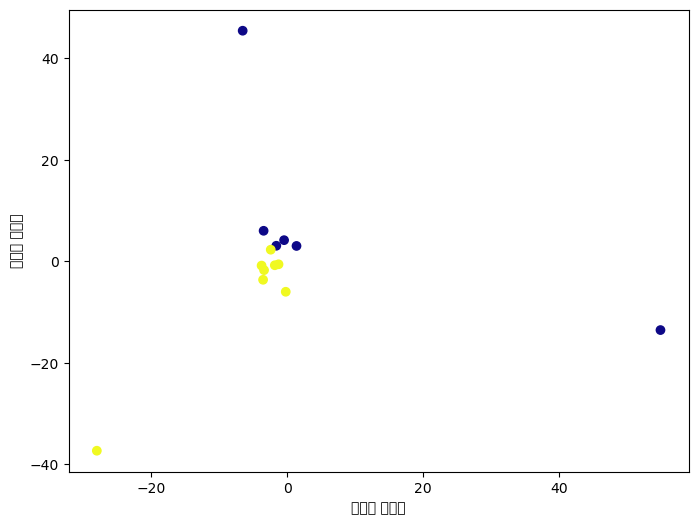

In [218]:
import numpy as np
import re
import glob
import codecs
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import os

path = '/Users/tmp/Desktop/viral_model/data_set_all/data_test_20'

data_list = []


data_path = glob.glob(path + '/*.txt')

# data path sorting !!!

data_path = sorted(data_path, key = lambda i : int(os.path.splitext(os.path.basename(i))[0]) )


# print(data_path)

for file in range(len(data_path)):
    with codecs.open(data_path[file], 'r', encoding = 'utf-8',
                    errors = 'ignore') as f:
        open_text = f.read()
        open_text = re.sub('[\n\r\t0-9\-\x0c❸ⓒ•a-zA-Z"“‘>]', "",
                    str(open_text.strip()))
        data_list.append(open_text)
        


       
        
#  데이터 전처리 



import konlpy
from konlpy.tag import Okt
t = Okt()

#형태소 나누기

data_token = [t.morphs(row) for row in data_list]

# print(data_token[0])

# token을 한 문장으로 만들기

data_sentence = []

for content in data_token:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    data_sentence.append(sentence)
    
    
# 벡터화

vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

data_set = vectorizer.fit_transform(data_sentence)

# svm


from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from scipy import sparse

from sklearn.preprocessing import StandardScaler, MinMaxScaler
    
from sklearn.metrics import confusion_matrix, accuracy_score
    
    
target = [0]* 10 + [1]* 10

# test split

x_train, x_test, y_train, y_test = train_test_split(data_set, target, test_size = 0.3, random_state = 42)

model = SVC(kernel = 'rbf', gamma = 1, C = 0.01)

# 단순 훈련

model.fit(x_train, y_train)


# print(model.score(x_train, y_train))
# 0.5714285714285714

# piple line

data_set = data_set.toarray(order = None, out = None)

x_train, x_test, y_train, y_test = train_test_split(data_set, target, test_size = 0.3, random_state = 42)

pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

x_train = pipeline.fit_transform(x_train)
x_test = pipeline.transform(x_test)

model.fit(x_train, y_train)


model.score(x_train, y_train)
# .5714285714285714


# 최적의 모델 찾기 

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01,0.1,0.5,1,10,100],
             'gamma': [1,0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
             'kernel' : ['rbf','poly''linear']}


grid = GridSearchCV(SVC(), param_grid = param_grid, cv = 5, refit = True, verbose = 1)


              
# grid.fit(x_train,y_train)
              
# grid.best_params_

# {'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}

# 데이터 스케일링

x_train, x_test, y_train, y_test = train_test_split(data_set, target, test_size = 0.3, random_state = 42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model.fit(x_train, y_train)
model.score(x_train,y_train)
# 0.5714285714285714

# PCA

from sklearn.decomposition import PCA

pca = PCA(n_components = 3)

x_train2 = pca.fit_transform(x_train) # z1, z2, z3
x_test2 = pca.fit_transform(x_test)

pca = PCA()
PCscore_train = pca.fit_transform(x_train)
PCscore_test = pca.transform(x_test)

eigen_value = pca.explained_variance_
eigen_value.shape

eigen_vector = pca.components_.transpose()


# np.dot(x_train, eigen_vector)

PCscore_train

eigen_value = pca.explained_variance_
choose = []

for i in eigen_value:
    a = i/np.sum(eigen_value)
    choose.append(a)

choose

plt.figure(figsize = (8,6))
plt.scatter(x_train2[:,0],x_train2[:,1], c=y_train, cmap = 'plasma')
plt.xlabel('첫번째 주성분')
plt.ylabel('두번째 주성분')

# 주 성분만 이용하여 svm 다시

param_grid = {'C': [0.01,0.1,0.5,1,10,100],
             'gamma': [1,0.75,0.5,0.25,0.1,0.01,0.001],
             'kernel': ['rbf','poly','linear']}

grid = GridSearchCV(SVC(), param_grid=param_grid, refit = True, verbose= 1 , cv = 5)
# grid.fit(x_train2,y_train)

# print(grid.best_params_)

# {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

svm_clf2 = SVC(C = 0.1, gamma = 1, kernel = 'linear', probability=True)
svm_clf2.fit(x_train2, y_train)

y_pred = svm_clf2.predict(x_test2)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))






#predict

path_3 = '/Users/tmp/Desktop/viral_model/data_set_all/data_test_2'

test_path = glob.glob(path_3+'/*.txt')
test_list = []

for file in range(len(test_path)):
    with codecs.open(test_path[file], 'r', encoding ='utf-8',
                    errors = 'ignore') as f:
        open_text = f.read()
        open_text = re.sub('[\n\t0-9\-\x0c❸ⓒ•a-zA-Z"“‘>]', "",
                          str(open_text.strip()))
        test_list.append(open_text)

        
test_sentence= []
    
test_token = [t.morphs(row) for row in test_list]

for content in test_token:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    test_sentence.append(sentence)

    
    


# 0 1 0 1 0 1
    
test_set = vectorizer.fit_transform(test_sentence)

test_set = test_set.toarray(order = None, out = None)


test_set = pipeline.fit_transform(test_set)


test_set = scaler.fit_transform(test_set)




pca = PCA(n_components = 3)

test_set = pca.fit_transform(test_set)



print(test_set)

print(svm_clf2.predict(test_set))

# 정답:  0 1 0 1 0 1
# 예측:  0 1 0 1 1 1 

# ----> 6개 중 5개 맞춤!!!!!
